EXPERIMENT 7

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Encode the target variable
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']


In [4]:
# Chi-Square Test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)

# Get chi-square scores
chi2_scores = chi2_selector.scores_
features = X.columns

# Create a DataFrame for chi-square scores
chi2_results = pd.DataFrame({'Feature': features, 'Chi-Square Score': chi2_scores})
print(chi2_results.sort_values(by='Chi-Square Score', ascending=False))


        Feature  Chi-Square Score
2  petal_length        116.169847
3   petal_width         67.244828
0  sepal_length         10.817821
1   sepal_width          3.594499


class           1.000000
petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width    -0.419446
Name: class, dtype: float64


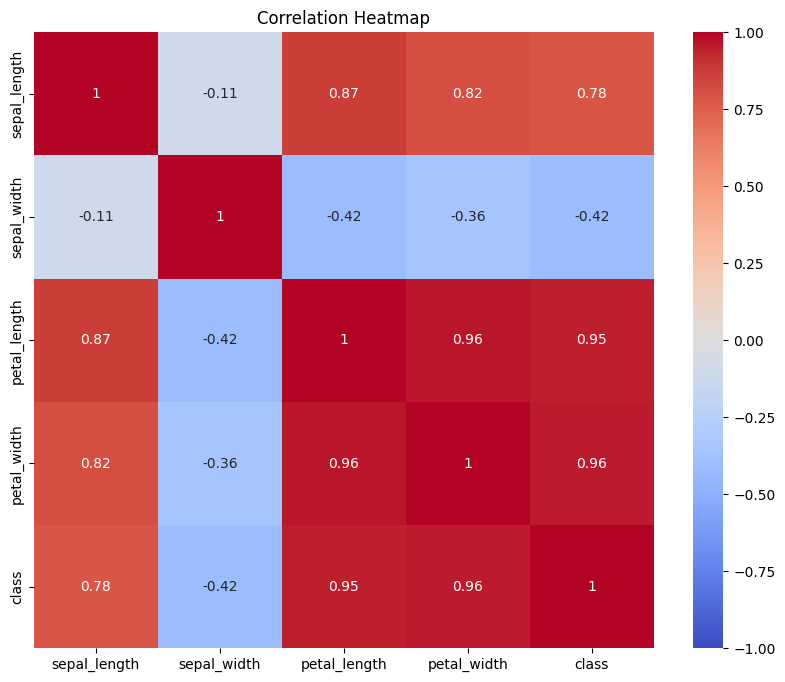

In [5]:
# Compute correlations
correlations = data.corr()
target_corr = correlations['class'].sort_values(ascending=False)
print(target_corr)

# Plot correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# ANOVA F-Value
f_values, _ = f_classif(X, y)
f_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values})
print(f_results.sort_values(by='F-Value', ascending=False))


        Feature      F-Value
2  petal_length  1179.034328
3   petal_width   959.324406
0  sepal_length   119.264502
1   sepal_width    47.364461


In [7]:
# Information Gain (Mutual Information)
mi = mutual_info_classif(X, y)
mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
print("\nInformation Gain (Mutual Information):")
print(mi_results.sort_values(by='Mutual Information', ascending=False))


Information Gain (Mutual Information):
        Feature  Mutual Information
2  petal_length            0.988690
3   petal_width            0.987493
0  sepal_length            0.480350
1   sepal_width            0.220442


EXPERIMENT 9 AND 10

In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the model on selected features
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

# Evaluate
print("Accuracy with RFE-selected features:", accuracy_score(y_test, y_pred))
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)


Accuracy with RFE-selected features: 1.0
Selected features: [False False  True  True]
Feature ranking: [2 3 1 1]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Forward Selection
sfs = SFS(model,
          k_features=2,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices
print('Selected features:', sfs.k_feature_idx_)
print('Selected feature names:', [iris.feature_names[i] for i in sfs.k_feature_idx_])
print('Cross-validation score:', sfs.k_score_)

# Train on selected features
model.fit(X_train[:, sfs.k_feature_idx_], y_train)
y_pred = model.predict(X_test[:, sfs.k_feature_idx_])

# Evaluate
print("Accuracy with Forward Selection-selected features:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

Selected features: (2, 3)
Selected feature names: ['petal length (cm)', 'petal width (cm)']
Cross-validation score: 0.9523809523809523
Accuracy with Forward Selection-selected features: 1.0


EXPERIMENT 11

BAGGING

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Bagging (Random Forest) Accuracy:", accuracy_score(y_test, y_pred_rf))


Bagging (Random Forest) Accuracy: 1.0


BOOSTING (ADABOOST, XG BOOST, CATBOOST, LIGHTGBM)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with Decision Tree base model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_adaboost = adaboost_model.predict(X_test)
print("Boosting (AdaBoost) Accuracy:", accuracy_score(y_test, y_pred_adaboost))


Boosting (AdaBoost) Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("Boosting (XGBoost) Accuracy:", accuracy_score(y_test, y_pred_xgb))


Boosting (XGBoost) Accuracy: 1.0


In [16]:
import lightgbm as lgb

# LightGBM Model
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
print("Boosting (LightGBM) Accuracy:", accuracy_score(y_test, y_pred_lgb))



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=50, random_state=42))
]

# Meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Fit stacking model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test)
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, y_pred_stack))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Stacking Ensemble Accuracy: 1.0
